연관규칙 관련 association rule  
아프리오제 알고리즘을 이용한 연관규칙  
  
범주형 변수 : 성별 같은 경우는 (남성, 여성)/ 연령대(20대, 30대 ..) / 등급 (A등급, B등급..)  
            이항변수화 하는 방법이 있는데 함수: OneHotEncoder 를 사용  
            ex) 성별(남:0, 여:1) = OneHotEncoder 사용 => 남=0, 여=1  
                나이(20대:0, 30대:1, 40대:2) =========> 20대:0, 30대:1, 40대:2 그치만 2가 나오면 이항변수가 아님 그러므로 3자리로 만들면 됨  
                                                        001    010    100  
                등급(s , a, b, c, d) ===============> S:00001, A:00010, B:00100, C:01000, D:10000  
                한개만 핫하게 만든다: 한개만 1  
                값들이 0 또는 1의 값을 갖는 가변수 (dummy variable)  

In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

In [6]:
#학생 ID  성별  연령대  성적
# sn_1   M/F  20대(0) A
# ..          30대(1) F
# sn_5
#          성별(0/1), 연령(0,1,2), 성적(0~4)
data=np.array([[0,0,0],
         [0,1,1],
         [0,2,2], #01 012 01234 #이걸
         [1,0,3], #01 100 00010 #이거로
         [1,1,4]  #01 010 00001 #이 작업을 if 구문 같은것으로 만들 수 있지만 굳이 수고스럽게 할 필요가 없다.
         ])       #OneHotEncoder를 사용하면 편리하다.
data

array([[0, 0, 0],
       [0, 1, 1],
       [0, 2, 2],
       [1, 0, 3],
       [1, 1, 4]])

In [7]:
ohe=OneHotEncoder()

In [8]:
ohe.fit(data) #fitting (적합시킨다)  원핫인코더를 데이터에 맞추었다
#원핫인코더가 인코딩을 수행할 수 있으려면, 데이터에 대한 정보가 필요하다.
#원핫인코더 입장에서 각각의 데이터마다 몇가지의 종류가 있는지 파악 하려는 의도.

OneHotEncoder()

In [11]:
ohe.transform(data)

<5x10 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [12]:
ohe.transform(data).toarray()

array([[1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1.]])

In [20]:
#Binarizer: 연속형 -> 이항변수화 or digitize(), where()
#OneHotEncoder: 범주형 -> 이항변수화
# 이산형화: 연속형 -> 2개 이상의 범주를 갖는 변수로 변환하는것, digitize(), where()
# ex) 점수(95) -> 90점이상: A, 80점 이상: B, ..., 60점미만: F

df=pd.DataFrame({
    'C1': np.random.randn(20),
    'C2': ['a']*10+['b']*10
}) #['a',...., 'a', 'b',....'b'] 10개씩
df

,C1,C2
0,-0.182557,a
1,0.418489,a
2,-0.603785,a
3,0.668411,a
4,0.223854,a
5,0.541215,a
6,0.902310,a
7,1.248321,a
8,-0.636548,a
9,0.078598,a


In [22]:
df.C1.max(), df.C1.min()

(1.2483205053146291, -1.750391418590704)

In [25]:
#df.c1 값을 최소~최대값을 9개 구간으로 균등하게 나눔
bins=np.linspace(df.C1.min(), df.C1.max(), 10) #새로열로 생각하면 9개구간이 10개의 숫자임
bins

array([-1.75039142, -1.4172012 , -1.08401099, -0.75082078, -0.41763056,
       -0.08444035,  0.24874986,  0.58194008,  0.91513029,  1.24832051])

In [26]:
df.C1

0    -0.182557
1     0.418489
2    -0.603785
3     0.668411
4     0.223854
5     0.541215
6     0.902310
7     1.248321
8    -0.636548
9     0.078598
10   -0.058950
11    1.055815
12    0.866666
13    0.197937
14    0.898252
15   -1.750391
16    0.389309
17   -0.252153
18   -0.109464
19   -1.530442
Name: C1, dtype: float64

In [28]:
np.digitize(df['C1'], bins) #bins : 구간에 대한 정보 (최소값과 최대값은 각각 1과 10이 됨)

array([ 5,  7,  4,  8,  6,  7,  8, 10,  4,  6,  6,  9,  8,  6,  8,  1,  7,
        5,  5,  1])

In [29]:
df['C1_bin']=np.digitize(df['C1'], bins)

In [30]:
df #이렇게 만들고 groupby 사용해서 그룹단위 개수, 평균.. 등 작업을 할 수 있다.

,C1,C2,C1_bin
0,-0.182557,a,5
1,0.418489,a,7
2,-0.603785,a,4
3,0.668411,a,8
4,0.223854,a,6
5,0.541215,a,7
6,0.902310,a,8
7,1.248321,a,10
8,-0.636548,a,4
9,0.078598,a,6


In [35]:
df.groupby('C1_bin').size()

C1_bin
1     2
4     2
5     3
6     4
7     3
8     4
9     1
10    1
dtype: int64

In [37]:
#각 그룹별 평균
df.groupby('C1_bin')['C1'].mean()

C1_bin
1    -1.640417
4    -0.620166
5    -0.181391
6     0.110360
7     0.449671
8     0.833910
9     1.055815
10    1.248321
Name: C1, dtype: float64

In [38]:
df.groupby('C1_bin')['C1'].std() #표준편차 #데이터가 한건인경우 편차를 구할수 없어서 : NaN

C1_bin
1     0.155528
4     0.023167
5     0.071351
6     0.129390
7     0.080611
8     0.111477
9          NaN
10         NaN
Name: C1, dtype: float64

In [46]:
#c1_bin 컬럼을 기준으로 그룹화 한 다음 그룹별 c2 컬럼 값의 개수를 출력
df.groupby('C1_bin')['C2'].value_counts()

C1_bin  C2
1       b     2
4       a     2
5       b     2
        a     1
6       a     2
        b     2
7       a     2
        b     1
8       a     2
        b     2
9       b     1
10      a     1
Name: C2, dtype: int64

In [50]:
# df의 'C1_bin'열의 값이 2와 같은 데이터만 출력
df[df.C1_bin==8]

,C1,C2,C1_bin
3,0.668411,a,8
6,0.902310,a,8
12,0.866666,b,8
14,0.898252,b,8


판다스의 getdummys()함수를 이용하면 간단하게 이항변수화를 한 가변수를 사용할수 있다.  
OneHotEncoder를 할때 가장 많이 사용하는 함수임  
                원핫인코딩  
id 과일명     id  사과 바나나 딸기  
1 사과       1    1   0    0  
2 바나나     2     0   1    0  
3 딸기       3    0   0    1  

In [55]:
fruit=pd.DataFrame({"name": ['apple','banana','cherry','durian',np.nan],
              "color":['red','yellow','red',np.nan,'green']
             })

In [56]:
pd.get_dummies(fruit['name'])

,apple,banana,cherry,durian
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,0


In [57]:
pd.get_dummies(fruit)

,name_apple,name_banana,name_cherry,name_durian,color_green,color_red,color_yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0


In [58]:
pd.get_dummies(fruit, columns=['name'])
#특정 열만 인코딩

,color,name_apple,name_banana,name_cherry,name_durian
0,red,1,0,0,0
1,yellow,0,1,0,0
2,red,0,0,1,0
3,NaN,0,0,0,1
4,green,0,0,0,0


In [59]:
pd.get_dummies(fruit, columns=['name'], dummy_na=True) #NaN을 인코딩하는 경우는 별로 없지만 옵션 알아두기

,color,name_apple,name_banana,name_cherry,name_durian,name_nan
0,red,1,0,0,0,0
1,yellow,0,1,0,0,0
2,red,0,0,1,0,0
3,NaN,0,0,0,1,0
4,green,0,0,0,0,1


In [67]:
df
#np.where 연속형 변수 -> 이산형화
#c1열의 평균값보다 크면 'high', 작으면 'low' 값을 df['high_low'] 변수에 저장
df['high_low']=np.where(df.C1.mean()<df.C1,'high','low')

In [68]:
df

,C1,C2,C1_bin,high_low
0,-0.182557,a,5,low
1,0.418489,a,7,high
2,-0.603785,a,4,low
3,0.668411,a,8,high
4,0.223854,a,6,high
5,0.541215,a,7,high
6,0.902310,a,8,high
7,1.248321,a,10,high
8,-0.636548,a,4,low
9,0.078598,a,6,low


In [78]:
#df의 high_low열에 대해 그룹화했을때 각 그룹에 대한 크기를 출력하시오
df.groupby('high_low')['C1_bin'].value_counts()

high_low  C1_bin
high      8         4
          7         3
          6         2
          9         1
          10        1
low       5         3
          1         2
          4         2
          6         2
Name: C1_bin, dtype: int64

In [80]:
# df.groupby('high_low')['C1'].size()
# df.groupby('high_low')['C1'].mean()
q1=np.percentile(df['C1'], 25) #25% 지점의 수 (1사분위수)
q3=np.percentile(df['C1'], 75) #75% 지점의 수 (3사분위수)

In [81]:
#df의 c1열 값이 3사분위수 보다 크면 'high', 그렇지 않고 1사분위수 보다 크면 'medium', 그렇지 않으면 'low'
df['hml']=np.where(df.C1>q3, 'high',np.where(df.C1>q1, 'medium', 'low'))
df

,C1,C2,C1_bin,high_low,hml
0,-0.182557,a,5,low,medium
1,0.418489,a,7,high,medium
2,-0.603785,a,4,low,low
3,0.668411,a,8,high,medium
4,0.223854,a,6,high,medium
5,0.541215,a,7,high,medium
6,0.902310,a,8,high,high
7,1.248321,a,10,high,high
8,-0.636548,a,4,low,low
9,0.078598,a,6,low,medium


In [84]:
#hml 컬럼값에 대해 그룹화, 각 그룹별 크기, 평균, 표준편차를 출력
df.groupby('hml')['C1'].size()

hml
high       5
low        5
medium    10
Name: C1, dtype: int64

In [85]:
df.groupby('hml')['C1'].mean()

hml
high      0.994273
low      -0.954664
medium    0.216684
Name: C1, dtype: float64

In [86]:
df.groupby('hml')['C1'].std()

hml
high      0.159913
low       0.648564
medium    0.286960
Name: C1, dtype: float64

## 구간 나누는 작업  
np.arange(): 부터~까지, 단위로 나눔  
np.linsapce(): 구간을 나눔 ex)히스토그램  
np.bincount(): 구간별 데이터 개수 셈  
np.digitize: 구간을 나눔 -> 매핑(구간 단위로 0 or 1...)  

In [89]:
np.arange(-1, 1, 0.1) #-1 에서 1까지 0.1씩 증가, 1은 포함 안됨
np.arange(-1, 1.05, 0.1) #1 에서 1.1 사이의 임의의 값을 주면 구간에 1까지 포함

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00])

In [91]:
np.linspace(-1, 1, 20) #20개 구간
np.linspace(-1, 1, 21) #1도 포함됨

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [95]:
np.random.randint(10) #0~9 사이의 임의의 정수
np.random.randint(10, size=5) #0~9 사이의 임의의 정수 난수 5개 발생
arr=np.random.randint(10, size=100)

In [96]:
arr

array([3, 6, 6, 8, 0, 9, 2, 6, 4, 8, 4, 2, 9, 7, 7, 4, 7, 1, 8, 1, 7, 9,
       3, 8, 0, 4, 8, 5, 3, 2, 1, 1, 8, 0, 0, 2, 2, 4, 3, 3, 2, 0, 0, 8,
       9, 2, 7, 4, 7, 9, 8, 7, 8, 5, 7, 1, 7, 0, 8, 8, 8, 4, 9, 5, 1, 7,
       6, 0, 1, 3, 0, 5, 8, 1, 1, 1, 9, 5, 8, 3, 8, 2, 5, 9, 9, 1, 8, 0,
       8, 7, 4, 4, 4, 4, 2, 1, 3, 6, 2, 2])

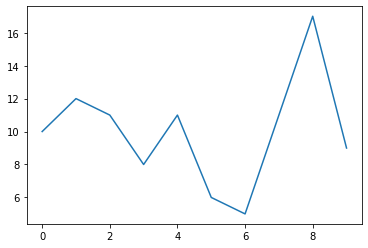

In [98]:
np.bincount(arr) #0~9 까지 각각의 데이터 개수
import matplotlib.pyplot as plt
plt.plot(np.bincount(arr))

In [99]:
np.bincount([7,5,5,6,7])
#0~7까지 범위에 대해, 각각의 데이터 개수가 출력
# 5가 2개, 7이 2개, 6이 1개

array([0, 0, 0, 0, 0, 2, 1, 2])

In [113]:
scores=[60,95,77,85,50,65,92, 90] #수우미양가 출력
g=np.digitize(scores, bins=[60,70,80,90]) #~59, 60~69, ...., 90~
                                        #  0,     1, ...., 4
    
#g= array([1, 4, 2, 3, 0, 1, 4, 4])
#0: 가, 1: 양,..., 4: 수
grade=['가','양','미','우','수']
res=[grade[i] for i in g]
res

['양', '수', '미', '우', '가', '양', '수', '수']

In [ ]:
#데이터 재구조화
# 피벗
# pivot_table이 pivot 함수보다 부가적인 기능도 많고 문제점도 해결되었다.

# stack, unstack, melt, wide_to_long....

pivot  
df.pivot(index, columns, values)  
df.pivot_table(data, index=, columns, values)  

index   col    val  
1       매출1   100
1       매출1   200
2       매입1   300
2       매입1   400

재구조화  
index 매출1  매입1  
1     100   300  
2     200   400  


In [159]:
data = pd.DataFrame({'cust_id': ['c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3'],
   'prod_cd': ['p1', 'p2', 'p3', 'p1', 'p2', 'p3', 'p1', 'p2', 'p3'],
   'grade' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'],
   'pch_amt': [30, 10, 0, 40, 15, 30, 0, 0, 10]})

data

,cust_id,prod_cd,grade,pch_amt
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


In [160]:
# df.pivot(index, columns, values) #pivot < pivot_table 함수를 주로 사용
# 데이터프레임.pivot() 데이터프레임이 갖고 있다.
df_pivot=data.pivot(index='cust_id', columns ='prod_cd', values='pch_amt')
df_pivot

prod_cd,p1,p2,p3
cust_id,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


In [161]:
df_pivot_t=pd.pivot_table(data, index='cust_id', columns ='prod_cd', values='pch_amt')
df_pivot_t
#고민할 것 없이 pivot_table을 사용하면 된다.


prod_cd,p1,p2,p3
cust_id,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


In [166]:
data
#index: cust_id, grade
#columns: prod_cd
#values: pch_amt

#인덱스 2개 안된다.. (에러..)
# data.pivot(index= ['cust_id', 'grade'], columns= 'prod_cd', values= 'pch_amt')

#pivot_table 은 인덱스가 2개도 된다 (열의 경우도 마찬가지)
pd.pivot_table(data, index= ['cust_id', 'grade'], columns= 'prod_cd', values= 'pch_amt')

,prod_cd,p1,p2,p3
cust_id,grade,,,
c1,A,30,10,0
c2,A,40,15,30
c3,B,0,0,10


In [167]:
# 마찬가지로 열도 2개이상 사용 못함 (피벗함수)
# data.pivot(index= 'cust_id', columns= ['grade','prod_cd'], values= 'pch_amt')

#피벗테이블은 열 2개이상 가능
pd.pivot_table(data, index= 'cust_id', columns= ['grade','prod_cd'], values= 'pch_amt')

grade       A                B           
prod_cd    p1    p2    p3   p1   p2    p3
cust_id                                  
c1       30.0  10.0   0.0  NaN  NaN   NaN
c2       40.0  15.0  30.0  NaN  NaN   NaN
c3        NaN   NaN   NaN  0.0  0.0  10.0

In [168]:
data

,cust_id,prod_cd,grade,pch_amt
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


In [169]:
#p1 = A 가 2개 있다 이렇게 중복될경우.. pivot 함수에서는 에러가 나온다.
#여기서는 2개인것을 함수를 사용해서 더해보도록 한다.
pd.pivot_table(data, index= 'grade', columns= 'prod_cd', values= 'pch_amt', aggfunc=np.mean) #aggfunc = np.mean 기본
pd.pivot_table(data, index= 'grade', columns= 'prod_cd', values= 'pch_amt', aggfunc=np.sum)

prod_cd,p1,p2,p3
grade,,,
A,70,25,30
B,0,0,10


In [170]:
#margins option사용하면 행과 열의 합계를 구할 수 있음.
pd.pivot_table(data, index= 'grade', columns= 'prod_cd', values= 'pch_amt', aggfunc=np.sum, margins=True)

prod_cd,p1,p2,p3,All
grade,,,,
A,70,25,30,125
B,0,0,10,10
All,70,25,40,135


In [171]:
#stack (위/아래)
#unstack (좌/우)

# 튜플로 부터 가져온 데이터로 다중인덱스를 만듬
mulIndex=pd.MultiIndex.from_tuples([('c1', '2020'),('c1', '2021'),
                                   ('c2', '2020'),('c2', '2021')])
mulIndex #다중 인덱스를 반드는 법

MultiIndex([('c1', '2020'),
            ('c1', '2021'),
            ('c2', '2020'),
            ('c2', '2021')],
           )

In [172]:
data=pd.DataFrame(np.arange(16).reshape(4,4),
                index=mulIndex,
                columns=['p1','p2','p3','p4'])
data

p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15

In [173]:
#데이터프레임 -> stack -> 시리즈
dataStacked=data.stack()
type(dataStacked)
dataStacked #0부터 15까지가 데이터고 나머지는 인덱스(levels로 불리기도 함)

c1  2020  p1     0
          p2     1
          p3     2
          p4     3
    2021  p1     4
          p2     5
          p3     6
          p4     7
c2  2020  p1     8
          p2     9
          p3    10
          p4    11
    2021  p1    12
          p2    13
          p3    14
          p4    15
dtype: int64

In [175]:
dataStacked.index

MultiIndex([('c1', '2020', 'p1'),
            ('c1', '2020', 'p2'),
            ('c1', '2020', 'p3'),
            ('c1', '2020', 'p4'),
            ('c1', '2021', 'p1'),
            ('c1', '2021', 'p2'),
            ('c1', '2021', 'p3'),
            ('c1', '2021', 'p4'),
            ('c2', '2020', 'p1'),
            ('c2', '2020', 'p2'),
            ('c2', '2020', 'p3'),
            ('c2', '2020', 'p4'),
            ('c2', '2021', 'p1'),
            ('c2', '2021', 'p2'),
            ('c2', '2021', 'p3'),
            ('c2', '2021', 'p4')],
           )

In [176]:
#인덱스로 참조
dataStacked['c2']
dataStacked['c1']['2021'][['p3','p4']]

p3    6
p4    7
dtype: int64

In [190]:
#
#dataStacked -> c2 의 p4 값을 모두 nan으로 변경
# dataStacked['c2'][['2020','2021']]['p4']
dataStacked['c2']['2020']['p4']=np.nan
dataStacked['c2']['2021']['p4']=np.nan

In [197]:
dataStacked

c1  2020  p1     0
          p2     1
          p3     2
          p4     3
    2021  p1     4
          p2     5
          p3     6
          p4     7
c2  2020  p1     8
          p2     9
          p3    10
          p4    11
    2021  p1    12
          p2    13
          p3    14
          p4    15
dtype: int64

In [195]:
#원본 데이터에서 변환하는법
data.loc['c2', 'p4']=np.nan

In [196]:
data

p1  p2  p3   p4
c1 2020   0   1   2  3.0
   2021   4   5   6  7.0
c2 2020   8   9  10  NaN
   2021  12  13  14  NaN

In [199]:
data.stack() #nan값이 생략됨 유지할 것인지 아닌지 설정가능 (dropna=True) default
data.stack(dropna=False)

c1  2020  p1     0.0
          p2     1.0
          p3     2.0
          p4     3.0
    2021  p1     4.0
          p2     5.0
          p3     6.0
          p4     7.0
c2  2020  p1     8.0
          p2     9.0
          p3    10.0
          p4     NaN
    2021  p1    12.0
          p2    13.0
          p3    14.0
          p4     NaN
dtype: float64

In [201]:
print(dataStacked) #여기서 원래의 상태로 되돌리고 싶을때, 
#level 3개 (대/중/소)
print(dataStacked.unstack()) #그냥 작성하면 하위의 인덱스가 소분류로 온다.

c1  2020  p1     0
          p2     1
          p3     2
          p4     3
    2021  p1     4
          p2     5
          p3     6
          p4     7
c2  2020  p1     8
          p2     9
          p3    10
          p4    11
    2021  p1    12
          p2    13
          p3    14
          p4    15
dtype: int64
         p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15


In [206]:
print(dataStacked.unstack(level=2)) #default 소분류
print(dataStacked.unstack(level=1)) #중분류
print(dataStacked.unstack(level=0)) #대분류

         p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15
       2020  2021
c1 p1     0     4
   p2     1     5
   p3     2     6
   p4     3     7
c2 p1     8    12
   p2     9    13
   p3    10    14
   p4    11    15
         c1  c2
2020 p1   0   8
     p2   1   9
     p3   2  10
     p4   3  11
2021 p1   4  12
     p2   5  13
     p3   6  14
     p4   7  15


In [208]:
print(type(dataStacked.unstack()))
dataStacked.unstack()

<class 'pandas.core.frame.DataFrame'>


p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15

In [210]:
df=dataStacked.unstack().reset_index()
df

,level_0,level_1,p1,p2,p3,p4
0,c1,2020,0,1,2,3
1,c1,2021,4,5,6,7
2,c2,2020,8,9,10,11
3,c2,2021,12,13,14,15


In [211]:
df.rename(columns={'level_0':'c_id', 'level_1':'year'}, inplace=True)
df

,c_id,year,p1,p2,p3,p4
0,c1,2020,0,1,2,3
1,c1,2021,4,5,6,7
2,c2,2020,8,9,10,11
3,c2,2021,12,13,14,15


In [215]:
df=pd.DataFrame(np.arange(6).reshape(2,3),
                columns=pd.Index(['one','two','three'], name='number'),
                index=pd.Index(['Ohio', 'Colorado'], name='state')) #index=['Ohio', 'Colorado']
df

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [216]:
df.stack()

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [217]:
#melt : 재구조화
data = pd.DataFrame({'cust_ID' : ['C_001', 'C_001', 'C_002', 'C_002'],
   'prd_CD' : ['P_001', 'P_002', 'P_001', 'P_002'],
   'pch_cnt' : [1, 2, 3, 4],
   'pch_amt' : [100, 200, 300, 400]})
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [218]:
pd.melt(data, id_vars=['cust_ID','prd_CD'])

,cust_ID,prd_CD,variable,value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [220]:
pd.melt(data, id_vars=['cust_ID','prd_CD'], var_name='pch_CD', value_name='pch_value')

,cust_ID,prd_CD,pch_CD,pch_value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [221]:
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [222]:
data_melt=pd.melt(data, id_vars=['cust_ID','prd_CD'], var_name='pch_CD', value_name='pch_value')
data_melt

,cust_ID,prd_CD,pch_CD,pch_value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [224]:
data_melt.index
data_melt.columns

Index(['cust_ID', 'prd_CD', 'pch_CD', 'pch_value'], dtype='object')

In [226]:
datamelt_pivot=pd.pivot_table(data_melt, index=['cust_ID', 'prd_CD'],
                              columns='pch_CD',
                              values='pch_value')
datamelt_pivot.index

MultiIndex([('C_001', 'P_001'),
            ('C_001', 'P_002'),
            ('C_002', 'P_001'),
            ('C_002', 'P_002')],
           names=['cust_ID', 'prd_CD'])

In [227]:
datamelt_pivot.columns

Index(['pch_amt', 'pch_cnt'], dtype='object', name='pch_CD')

# 실전

In [228]:
# 각각의 종교별 연봉
pew=pd.read_csv("pew.csv")
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [230]:
pew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [235]:
pew_long=pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
pew_long.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [236]:
billboard=pd.read_csv('billboard.csv')
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
pd.melt(billboard, id_vars=['year','artist','track','time','date.entered'], var_name='week', value_name='rating')

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [240]:
ebola=pd.read_csv("country_timeseries.csv")
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [241]:
pd.melt(ebola, id_vars=['Date','Day'], var_name='variable', value_name='value')

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [246]:
ebola_long=pd.melt(ebola, id_vars=['Date','Day'], var_name='variable', value_name='value')

In [247]:
ebola_long.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [255]:
#******************* 꿀팁 *******************
var_split=ebola_long.variable.str.split("_") #그냥 split 하면 안됨.. str 사이에 넣어주기!
sta_value=var_split.str.get(0) #0 번째에 해당하는 요소
coun_value=var_split.str.get(1)
coun_value

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [256]:
ebola_long['status']=sta_value
ebola_long['country']=coun_value
ebola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [261]:
weather=pd.read_csv("weather.csv")
weather.head()

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
weather_melt=pd.melt(weather, id_vars=['id','year','month','element'], var_name='day', value_name='temp')
weather_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [267]:
#pivot_table 2개를 함께 사용하는 경우
weather_tidy=weather_melt.pivot_table(
index=['id', 'year', 'month', 'day'],
columns='element',
values='temp')
weather_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [266]:
weather_tidy.reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2
